In [1]:
import sys
sys.path.insert(0, '../src')
sys.path.insert(0, '../')

import numpy as np
import torch
import matplotlib.pyplot as plt

from drawing import draw_window
from image import get_image_tensor, get_numpy_image
from shape import Window, Position
from roi_align import RoIAlignFeatureExtractor
from matcher import CnnMatcher, Window
from image import load_image
from feature_extractor import CNN
from candidates import Candidates
from scorer import CosineSimilarityScorer

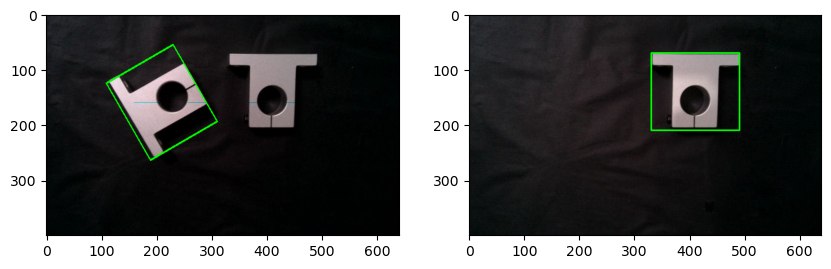

In [2]:
target_img = load_image('../data/image_1.png')
template_img = load_image('../data/template_1.jpg')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

target_window = Window(210, 160, 160, 140, -120)
draw_img = draw_window(target_img, target_window)
axes[0].imshow(draw_img)
axes[0].set_title('target')

template_window = Window(410., 140., 160., 140., 0)
draw_img = draw_window(template_img, template_window)
axes[1].imshow(draw_img)
axes[1].set_title('template')

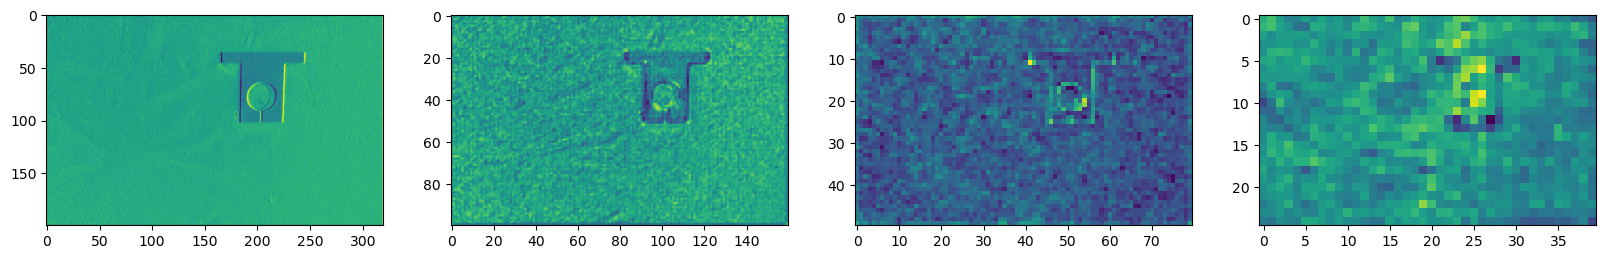

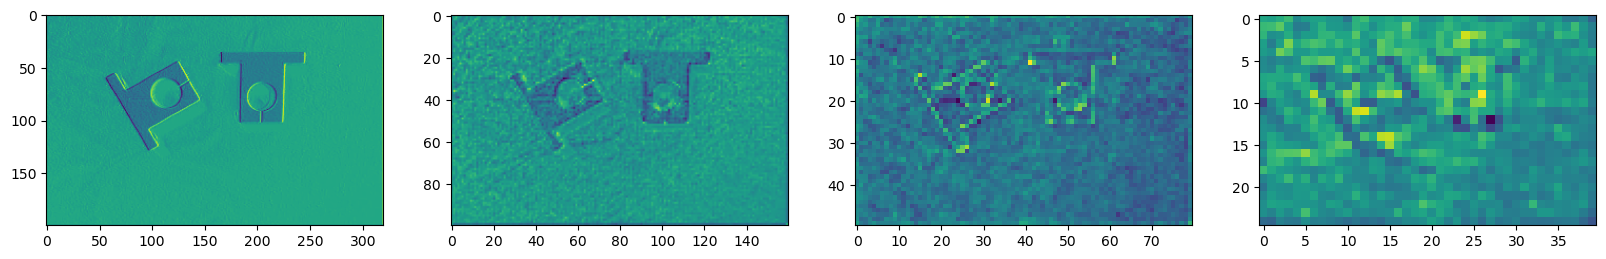

In [3]:
model_name = 'tf_efficientnet_lite0'
feature_extractor = CNN(model_name)

template_feature_maps = feature_extractor(template_img)
target_feature_maps = feature_extractor(target_img)

template_feature_maps.visualize()
target_feature_maps.visualize()
